<a href="https://colab.research.google.com/github/josediaz2-Udea/Deep_Learning_Proyect_UDEA/blob/main/01_Exploraci%C3%B3n_de_datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Exploración de Datos (EDA)
Antes de iniciar el preprocesamiento para el modelo de Deep Learning, realizamos un análisis exploratorio del dataset original `ecommerce_product_reviews_dataset.csv`.

**Objetivos del EDA:**
1.  Entender la estructura y tipos de datos.
2.  Detectar valores nulos o duplicados.
3.  Analizar la distribución de la variable objetivo (`rating`) para identificar desbalances.
4.  Explorar las características del texto (longitud de reseñas, palabras frecuentes).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import io
from google.colab import files

# Configuración de estilo para gráficos
sns.set_style("whitegrid")
plt.rc('figure', figsize=(10, 6))

print("--- CARGA DE DATASET ORIGINAL PARA EDA ---")
uploaded = files.upload()
filename = list(uploaded.keys())[0]

try:
    df_eda = pd.read_csv(io.BytesIO(uploaded[filename]), encoding='utf-8')
except UnicodeDecodeError:
    df_eda = pd.read_csv(io.BytesIO(uploaded[filename]), encoding='latin1')

print(f"✅ Dataset cargado: {df_eda.shape[0]} filas, {df_eda.shape[1]} columnas.")

--- CARGA DE DATASET ORIGINAL PARA EDA ---


Saving ecommerce_product_reviews_dataset.csv to ecommerce_product_reviews_dataset.csv
✅ Dataset cargado: 4000000 filas, 6 columnas.


# 2. Inspección de Calidad de Datos
Verificamos los tipos de datos, la existencia de valores nulos (missing values) y duplicados. Esto es crucial para decidir estrategias de limpieza.

In [2]:
# Vista previa
print("\n--- Primeras 5 filas ---")
display(df_eda.head())

# Información general
print("\n--- Información del Dataset ---")
df_eda.info()

# Chequeo de Nulos
print("\n--- Conteo de Valores Nulos ---")
print(df_eda.isnull().sum())

# Chequeo de Duplicados
duplicados = df_eda.duplicated().sum()
print(f"\n--- Filas Duplicadas: {duplicados} ({duplicados/len(df_eda):.2%}) ---")


--- Primeras 5 filas ---


,product_id,product_title,category,review_text,rating,sentiment
0,4589130,Stainless Steel Blender,Home & Kitchen,Fast shipping and great packaging.,5,Positive
1,4716121,Long-Wear Matte Lipstick,Beauty,Highly recommend. Excellent quality.,5,Positive
2,9640962,Electric Toothbrush,Health & Personal Care,"Terrible experience, do not buy.",1,Negative
3,4442583,Hydrating Facial Serum,Beauty,"Does the job, but not impressed.",4,Positive
4,9757659,LEGO Building Kit,Toys & Games,Exactly what I needed!,5,Positive



--- Información del Dataset ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000000 entries, 0 to 3999999
Data columns (total 6 columns):
 #   Column         Dtype 
---  ------         ----- 
 0   product_id     int64 
 1   product_title  object
 2   category       object
 3   review_text    object
 4   rating         int64 
 5   sentiment      object
dtypes: int64(2), object(4)
memory usage: 183.1+ MB

--- Conteo de Valores Nulos ---
product_id       0
product_title    0
category         0
review_text      0
rating           0
sentiment        0
dtype: int64

--- Filas Duplicadas: 3998304 (99.96%) ---


# 3. Distribución de la Variable Objetivo (Ratings)
Analizamos cómo se distribuyen las calificaciones de estrellas (1 a 5).
En E-commerce, es común ver un **desbalance de clases**, donde las reseñas de 5 estrellas dominan sobre las de 1 o 2 estrellas. Este gráfico nos confirmará si necesitamos aplicar técnicas de re-muestreo o métricas como F1-Score.

/tmp/ipython-input-2260702274.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='rating', data=df_eda, palette='viridis')


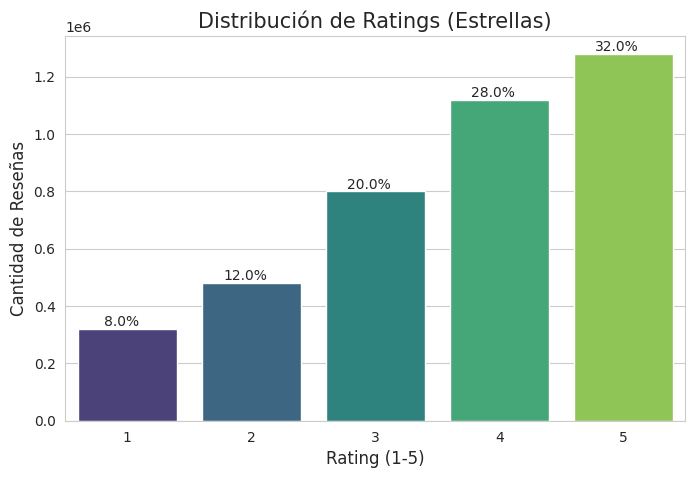

In [3]:
plt.figure(figsize=(8, 5))
ax = sns.countplot(x='rating', data=df_eda, palette='viridis')

plt.title('Distribución de Ratings (Estrellas)', fontsize=15)
plt.xlabel('Rating (1-5)', fontsize=12)
plt.ylabel('Cantidad de Reseñas', fontsize=12)

# Añadir porcentajes sobre las barras
total = len(df_eda)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 2 - 0.05
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom')

plt.show()

# 4. Análisis de Longitud de Texto
Creamos una nueva variable `word_count` para medir cuántas palabras tiene cada reseña.
Analizar esto nos ayuda a:
1.  Definir la longitud máxima (`MAX_LENGTH`) para el Padding en la red neuronal.
2.  Ver si hay correlación entre la longitud y el sentimiento (ej. ¿las quejas son más largas?).

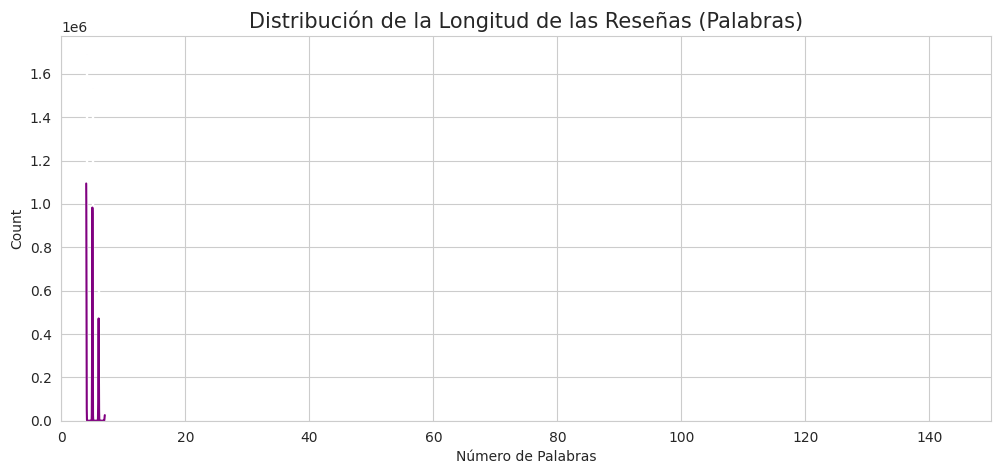

Estadísticas de longitud de palabras:
count    4.000000e+06
mean     4.781139e+00
std      7.737222e-01
min      4.000000e+00
25%      4.000000e+00
50%      5.000000e+00
75%      5.000000e+00
max      7.000000e+00
Name: word_count, dtype: float64


/tmp/ipython-input-2897649901.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='rating', y='word_count', data=df_eda, palette='coolwarm')


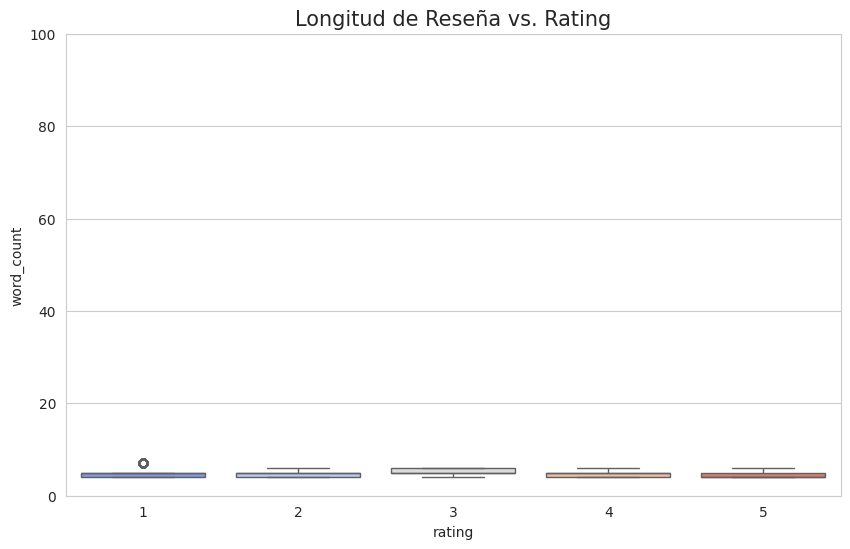

In [4]:
# Crear columna de conteo de palabras
df_eda['word_count'] = df_eda['review_text'].astype(str).apply(lambda x: len(x.split()))

# 1. Histograma de longitud
plt.figure(figsize=(12, 5))
sns.histplot(df_eda['word_count'], bins=50, kde=True, color='purple')
plt.title('Distribución de la Longitud de las Reseñas (Palabras)', fontsize=15)
plt.xlabel('Número de Palabras')
plt.xlim(0, 150) # Limitamos visualmente para ver el grueso de datos
plt.show()

# Estadísticas básicas de longitud
print("Estadísticas de longitud de palabras:")
print(df_eda['word_count'].describe())

# 2. Relación Longitud vs Rating (Boxplot)
plt.figure(figsize=(10, 6))
sns.boxplot(x='rating', y='word_count', data=df_eda, palette='coolwarm')
plt.title('Longitud de Reseña vs. Rating', fontsize=15)
plt.ylim(0, 100) # Zoom para ver mejor las cajas
plt.show()

# 5. Análisis Semántico Visual (WordCloud)
Generamos una Nube de Palabras para visualizar los términos más frecuentes en el corpus.
Esto nos permite identificar rápidamente de qué hablan los usuarios (ej. "quality", "price", "shipping") y verificar si existen "stopwords" (palabras vacías como "the", "and") que deban limpiarse.

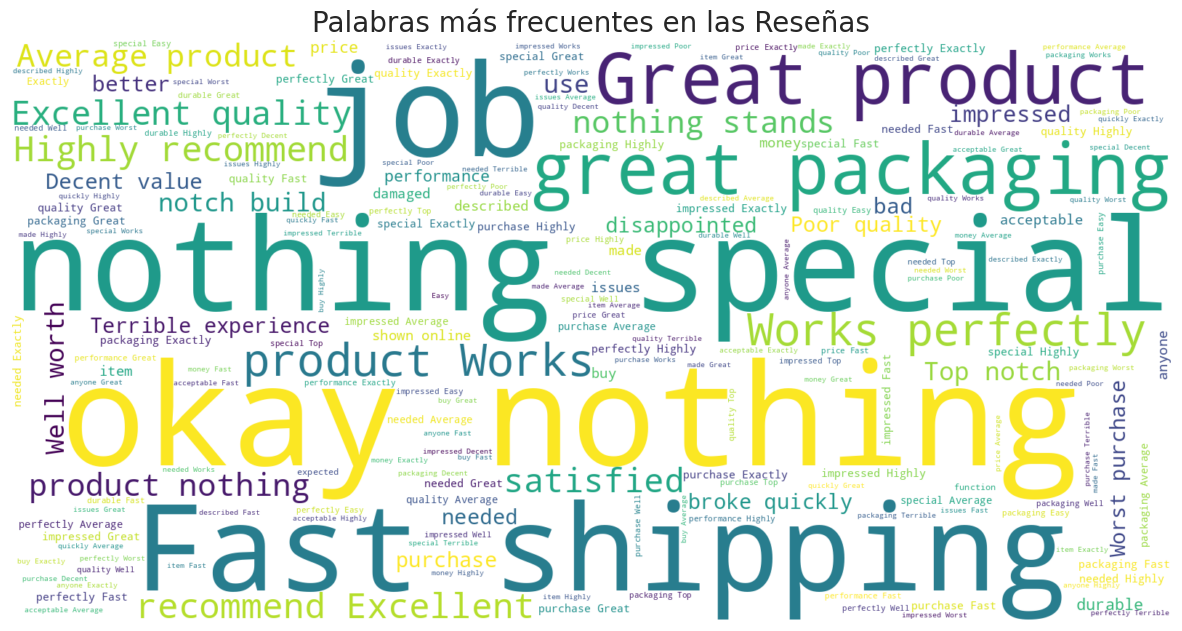

In [5]:
from wordcloud import WordCloud, STOPWORDS

# Unimos todo el texto en un solo string gigante
text_corpus = " ".join(review for review in df_eda.review_text.astype(str))

# Configuración del WordCloud
wordcloud = WordCloud(
    width=1600,
    height=800,
    background_color='white',
    stopwords=STOPWORDS,
    min_font_size=10
).generate(text_corpus)

# Visualización
plt.figure(figsize=(15, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off") # Sin ejes
plt.title("Palabras más frecuentes en las Reseñas", fontsize=20)
plt.show()

# 6. Análisis por Categoría de Producto
Identificamos cuáles son las categorías de productos más reseñadas. Esto da contexto de negocio sobre qué tipo de artículos predominan en el dataset (Electrónica, Ropa, Hogar, etc.).

/tmp/ipython-input-1334170028.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_categories.index, x=top_categories.values, palette='mako')


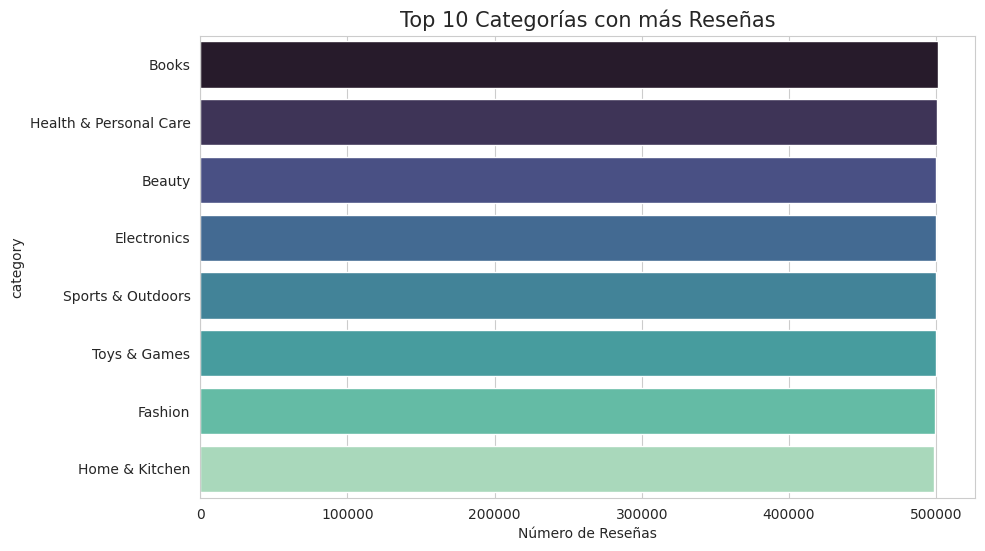

In [6]:
# Top 10 Categorías
top_categories = df_eda['category'].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(y=top_categories.index, x=top_categories.values, palette='mako')
plt.title('Top 10 Categorías con más Reseñas', fontsize=15)
plt.xlabel('Número de Reseñas')
plt.show()